# PASSNYC Competition 

## Overview (from Kaggle): 

PASSNYC and its partners provide outreach services that improve the chances of students taking the SHSAT and receiving placements in these specialized high schools. The current process of identifying schools is effective, but PASSNYC could have an even greater impact with a more informed, granular approach to quantifying the potential for outreach at a given school. Proxies that have been good indicators of these types of schools include data on English Language Learners, Students with Disabilities, Students on Free/Reduced Lunch, and Students with Temporary Housing.

Part of this challenge is to assess the needs of students by using publicly available data to quantify the challenges they face in taking the SHSAT. The best solutions will enable PASSNYC to identify the schools where minority and underserved students stand to gain the most from services like after school programs, test preparation, mentoring, or resources for parents.

Submissions for the Main Prize Track will be judged based on the following general criteria:

Performance - How well does the solution match schools and the needs of students to PASSNYC services? PASSNYC will not be able to live test every submission, so a strong entry will clearly articulate why it is effective at tackling the problem.

Influential - The PASSNYC team wants to put the winning submissions to work quickly. Therefore a good entry will be easy to understand and will enable PASSNYC to convince stakeholders where services are needed the most.

Shareable - PASSNYC works with over 60 partner organizations to offer services such as test preparation, tutoring, mentoring, extracurricular programs, educational consultants, community and student groups, trade associations, and more. Winning submissions will be able to provide convincing insights to a wide subset of these organizations.

## Introduction

For this project, I plan to use machine learning models to identify the features of participating schools that had the greatest positive impact on overall student performance. 

## Data Sources

Both datasets were taken from the Kaggle "Data Science for Social Good: PASSNYC" competition (https://www.kaggle.com/passnyc/data-science-for-good). 

## Importing Data

In [1]:
#import all needed packages
import pandas as pd
import csv as csv
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re 

#import databases
schools = pd.read_csv(r"C:\Users\t_gas\Desktop\Data Portfolio\Kaggle Competition_PassNYC\2016 School Explorer.csv")
testers = pd.read_csv(r"C:\Users\t_gas\Desktop\Data Portfolio\Kaggle Competition_PassNYC\D5 SHSAT Registrations and Testers.csv")

In [2]:
#first look at "schools" dataframes
schools.sample(5)

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
456,NaN,NaN,NaN,P.S. 067 CHARLES A. DORSEY,331300010067,13K067,13,40.695143,-73.977889,"51 ST EDWARDS ST BROOKLYN, NY 11205",...,0,0,0,0,0,0,0,0,0,0
1100,NaN,NaN,NaN,J.H.S. 291 ROLAND HAYES,333200010291,32K291,32,40.695648,-73.915406,"231 PALMETTO ST BROOKLYN, NY 11221",...,123,0,0,0,0,0,0,0,0,0
1003,NaN,NaN,NaN,P.S. 076 WILLIAM HALLET,343000010076,30Q076,30,40.760848,-73.941632,"36-36 10TH ST LONG ISLAND CITY, NY 11106",...,0,0,0,0,0,0,0,0,0,0
205,NaN,NaN,NaN,P.S. 157 GROVE HILL,320700010157,07X157,7,40.819262,-73.909065,"757 CAULDWELL AVE BRONX, NY 10456",...,0,0,0,0,0,0,0,0,0,0
1139,NaN,NaN,NaN,BROOKLYN CHARTER SCHOOL,331400860809,84K701,14,40.694156,-73.947790,"545 WILLOUGHBY AVE BROOKLYN, NY 11206",...,0,0,0,0,0,0,0,0,0,0


The first thing I notice is that there is a lot of missing data, especially in columns "Adjusted Grade" and "New?". Judging by the name of these columns, however, it could be that there isn't much data available. 

Before continuing, I want to see how much data is actually missing. 

In [3]:
# get the number of missing data points per column
missing_values_schools = schools.isnull().sum()

# identify total number of missing values
total_cells_schools = np.product(schools.shape)
total_missing_schools = missing_values_schools.sum()

# calculate percent of data that is missing
(total_missing_schools/total_cells_schools) * 100

2.4678698386655729

Good! It looks as if only 2.5% of the data is missing.

In [4]:
#first look at "testers" dataframes
testers.sample(5)

,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
78,05M692,"High School for Mathematics, Science and Engin...",2013,9,123,15,12
99,84M336,KIPP Infinity Charter School,2016,9,79,0,0
117,84M388,St. HOPE Leadership Academy Charter School,2013,8,68,27,24
115,84M350,Democracy Prep Charter School,2016,9,113,0,0
50,05M369,Urban Assembly School for the Performing Arts,2014,9,132,2,0


In [5]:
print(testers.columns)

Index(['DBN', 'School name', 'Year of SHST', 'Grade level',
       'Enrollment on 10/31',
       'Number of students who registered for the SHSAT',
       'Number of students who took the SHSAT'],
      dtype='object')


This second dataframe looks to be more complete, but let's check to make sure.

In [6]:
# get the number of missing data points per column
missing_values_testers = testers.isnull().sum()

# identify total number of missing values
total_cells_testers = np.product(testers.shape)
total_missing_testers = missing_values_testers.sum()

# calculate percent of data that is missing
(total_missing_testers/total_cells_testers) * 100

0.0

Even better!

## Cleaning Data

Each row of the dataframes should contain the name of a NYC school - this means, no names should be duplicated. Let's see if this holds true by examining the column of school names.

In [7]:
#get all unique values
school_name = schools['School Name'].unique()

# sort them alphabetically and then take a closer look
school_name.sort()
school_name

array(['A.C.E. ACADEMY FOR SCHOLARS AT THE GERALDINE FERRARO CAMPUS',
       'ACADEMIC LEADERSHIP CHARTER SCHOOL',
       'ACADEMY FOR COLLEGE PREPARATION AND CAREER EXPLORATION: A COLLEGE BOARD SCHOOL',
       ..., "YOUNG WOMEN'S LEADERSHIP SCHOOL OF THE BRONX",
       "YOUNG WOMEN'S LEADERSHIP SCHOOL, ASTORIA",
       "YOUNG WOMEN'S LEADERSHIP SCHOOL, QUEENS"], dtype=object)

Nothing immediately sticks out as being written incorrectly, but I will compare the length of the array to the total number of rows within the dataframe. 

In [8]:
#number of values in the list of non-duplicate values
len(school_name)

1270

In [9]:
#total number of values in the original dataframe
schools.shape

(1272, 161)

It appears that not many values have been duplicated. I will use .duplicated() to find out exactly which values are repeated and why. 

In [10]:
#pull only rows containing duplicated values
schools[schools['School Name'].duplicated(keep=False)]

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
427,NaN,NaN,NaN,P.S. 212,321200010212,12X212,12,40.828715,-73.900452,"1180 TINTON AVE BRONX, NY 10456",...,57,1,0,0,1,0,0,0,0,0
712,NaN,NaN,NaN,P.S. 253,332100010253,21K253,21,40.580084,-73.961946,"601 OCEANVIEW AVE BROOKLYN, NY 11235",...,0,0,0,0,0,0,0,0,0,0
908,NaN,NaN,NaN,P.S. 253,342700010253,27Q253,27,40.607296,-73.748812,"1307 CENTRAL AVE FAR ROCKAWAY, NY 11691",...,0,0,0,0,0,0,0,0,0,0
1023,NaN,NaN,NaN,P.S. 212,343000010212,30Q212,30,40.753191,-73.884900,"34-25 82ND ST JACKSON HEIGHTS, NY 11372",...,0,0,0,0,0,0,0,0,0,0


It looks like there are two schools whose names are listed twice in the dataframe. Curiously, each school has a different SED code and district number. This leads me to believe that they are in fact different schools, but I may have to dig into the dataset's documentation or look online for more information. Because only four rows of data are affected, I'm not too concerned with it right now.  

Let's check the other dataframe. 

In [11]:
#get all unique values
school_name_testers = testers['School name'].unique()

# sort them alphabetically and then take a closer look
school_name_testers.sort()
school_name_testers

array(['Academy for Social Action',
       'Academy for Social Action: A College Board School',
       'Choir Academy of Harlem', 'Columbia Secondary School',
       'Democracy Prep Charter School',
       'Democracy Prep Endurance Charter School',
       'Democracy Prep Harlem Charter School',
       'Eagle Academy for Young Men of Harlem',
       'Frederick Douglass Academy',
       "Harlem Children's Zone Promise Academy 1 Charter School",
       "Harlem Children's Zone Promise Academy II Charter School",
       'Harlem Village Academy Charter School',
       'High School for Mathematics, Science and Engineering at City College',
       'I.S. M286 Renaissance Leadership Academy', 'KAPPA IV',
       'KIPP Infinity Charter School',
       'KIPP STAR College Prep Charter School', 'Mott Hall High School',
       'New Design Middle School', 'P.S. 046 Arthur Tappan',
       'P.S. 123 Mahalia Jackson', 'P.S. 129 John H. Finley',
       'P.S. 161 Pedro Albizu Campos',
       'St. HOPE Leade

In [12]:
#number of values in the list of non-duplicate values
len(school_name_testers)

30

In [13]:
#total number of values in the original dataframe
testers.shape

(140, 7)

Uh oh! It looks like way more items are duplicated in this second dataframe.

In [14]:
#pull only rows that contain duplicated values
testers[testers['School name'].duplicated(keep=False)]

,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
0,05M046,P.S. 046 Arthur Tappan,2013,8,91,31,14
1,05M046,P.S. 046 Arthur Tappan,2014,8,95,26,7
2,05M046,P.S. 046 Arthur Tappan,2015,8,73,21,10
3,05M046,P.S. 046 Arthur Tappan,2016,8,56,20,8
4,05M123,P.S. 123 Mahalia Jackson,2013,8,62,31,14
5,05M123,P.S. 123 Mahalia Jackson,2014,8,62,25,13
6,05M123,P.S. 123 Mahalia Jackson,2015,8,62,12,5
7,05M123,P.S. 123 Mahalia Jackson,2016,8,55,16,5
8,05M129,P.S. 129 John H. Finley,2013,8,84,58,14
9,05M129,P.S. 129 John H. Finley,2014,8,55,23,12


It looks like this discrepency was due to the "Year" and "Grade level" columns, something I didn't immediately notice when using .sample() to explore the data. Because the first dataframe only contains school information for the year 2016, I might have to consider reshaping this dataframe, so that the years 2013-2016 are not all in one column.

But first, I want to perform some basic Exploratory Data Analysis (EDA) to get a better understanding of what my data looks like. 

## Exploratory Data Analysis 

I want to begin my EDA with the data that has already been categorized. To do this, I want to first create a smaller dataframe with less columns.

In [15]:
#create smaller dataframe
schools_sm = schools[['School Name',
 'SED Code',
 'Location Code',
 'District',
 'Address (Full)',
 'City',
 'Zip',
 'Grade Low',
 'Grade High',
 'Community School?',
 'Economic Need Index',
 'School Income Estimate',
 'Percent ELL',
 'Percent Asian',
 'Percent Black',
 'Percent Hispanic',
 'Percent Black / Hispanic',
 'Percent White',
 'Student Attendance Rate',
 'Percent of Students Chronically Absent',
 'Rigorous Instruction %',
 'Rigorous Instruction Rating',
 'Collaborative Teachers %',
 'Collaborative Teachers Rating',
 'Supportive Environment %',
 'Supportive Environment Rating',
 'Effective School Leadership %',
 'Effective School Leadership Rating',
 'Strong Family-Community Ties %',
 'Strong Family-Community Ties Rating',
 'Trust %',
 'Trust Rating',
 'Student Achievement Rating',
 'Average ELA Proficiency',
 'Average Math Proficiency']].copy()

schools_sm.sample(5)

,School Name,SED Code,Location Code,District,Address (Full),City,Zip,Grade Low,Grade High,Community School?,...,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency
1234,FAMILY LIFE ACADEMY CHARTER SCHOOL II,320700861028,84X233,7,"296 E 140TH ST BRONX, NY 10454",BRONX,10454,0K,05,No,...,NaN,84%,NaN,89%,NaN,98%,NaN,NaN,NaN,NaN
496,BROOKLYN ARBOR ELEMENTARY SCHOOL,331400010414,14K414,14,"325 S 3RD ST BROOKLYN, NY 11238",BROOKLYN,11238,0K,05,No,...,Exceeding Target,88%,Meeting Target,93%,Exceeding Target,97%,Exceeding Target,NaN,2.27,2.57
367,EAST FORDHAM ACADEMY FOR THE ARTS,321000011459,10X459,10,"120 E 184TH ST BRONX, NY 10468",BRONX,10468,06,08,No,...,Meeting Target,71%,Not Meeting Target,78%,Approaching Target,83%,Approaching Target,Approaching Target,2.14,1.97
279,P.S. 199X - THE SHAKESPEARE SCHOOL,320900010199,09X199,9,"1449 SHAKESPEARE AVE BRONX, NY 10452",BRONX,10452,PK,05,No,...,Approaching Target,69%,Approaching Target,82%,Approaching Target,82%,Approaching Target,Approaching Target,2.21,2.31
536,M.S. 839,331500010839,15K839,15,"713 CATON AVE BROOKLYN, NY 11218",BROOKLYN,11218,06,08,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looking more closely at the data, I see that many factors of school performance and student risk have already been categorized. For example, when looking at the "Student Achievement Rating" column:

In [16]:
#pull unique values within column
schools_sm['Student Achievement Rating'].unique()

array(['Approaching Target', 'Exceeding Target', 'Meeting Target', nan,
       'Not Meeting Target'], dtype=object)

I see there are four categories: "Approaching Target," "Exceeding Target," "Meeting Target," and "Not Meeting Target." This will be very useful as I begin to explore the dataframes. For example, after I reshape the dataframe, I can use these categories and plot a clustered bar chart, to get a quick overview about how all of the schools performed with each criteria.

In [17]:
criteria = schools_sm[['Rigorous Instruction Rating','Collaborative Teachers Rating','Supportive Environment Rating','Effective School Leadership Rating','Strong Family-Community Ties Rating','Trust Rating']].copy()
criteria_counts = criteria.apply(lambda c: c.value_counts()).reindex(["Not Meeting Target", "Approaching Target", "Meeting Target", "Exceeding Target"])

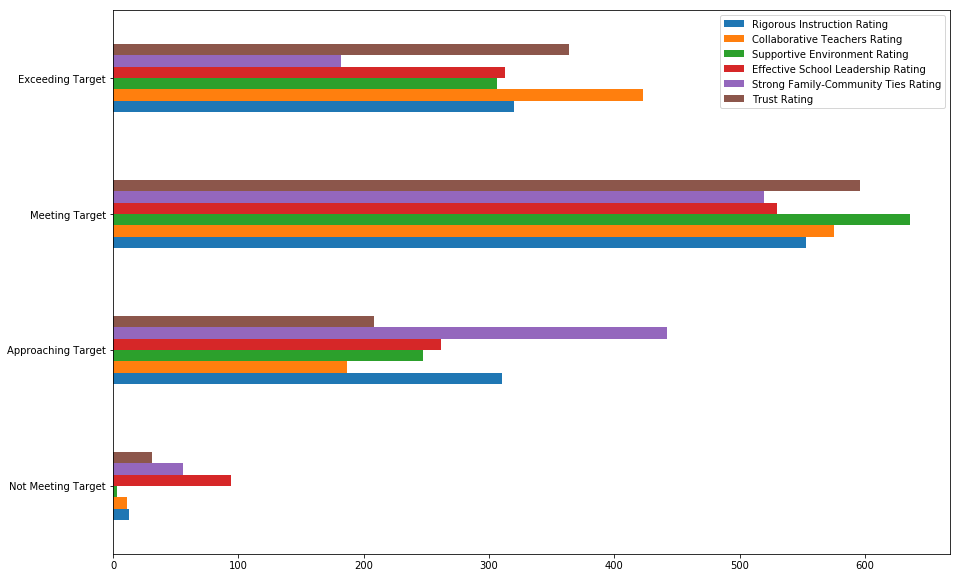

In [18]:
criteria_counts.plot.barh(figsize=(15,10))
plt.legend(loc='upper right')
plt.show()

The bar chart gives me a better understanding of how each of the criteria are categorized. To get an even clearer picture about how the data is distributed, I will use a density graph. But first, I will need to convert the dataframe's percentages into numeric values (because they are currently saved as objects). 

In [19]:
schools_sm.dtypes

School Name                                object
SED Code                                    int64
Location Code                              object
District                                    int64
Address (Full)                             object
City                                       object
Zip                                         int64
Grade Low                                  object
Grade High                                 object
Community School?                          object
Economic Need Index                       float64
School Income Estimate                     object
Percent ELL                                object
Percent Asian                              object
Percent Black                              object
Percent Hispanic                           object
Percent Black / Hispanic                   object
Percent White                              object
Student Attendance Rate                    object
Percent of Students Chronically Absent     object


In [20]:
#replace NaN with 0
schools_sm = schools_sm.fillna(0)

#remove % sign
schools_sm.iloc[:, [20, 22, 24, 26, 28, 30]] = schools_sm.iloc[:, [20, 22, 24, 26, 28, 30]].replace({'\%':''}, regex = True)

#convert to integer
schools_sm.iloc[:, [20, 22, 24, 26, 28, 30]] = schools_sm.iloc[:, [20, 22, 24, 26, 28, 30]].astype(int)

In [21]:
schools_sm.dtypes

School Name                                object
SED Code                                    int64
Location Code                              object
District                                    int64
Address (Full)                             object
City                                       object
Zip                                         int64
Grade Low                                  object
Grade High                                 object
Community School?                          object
Economic Need Index                       float64
School Income Estimate                     object
Percent ELL                                object
Percent Asian                              object
Percent Black                              object
Percent Hispanic                           object
Percent Black / Hispanic                   object
Percent White                              object
Student Attendance Rate                    object
Percent of Students Chronically Absent     object


Now that my data is stored numerically, I can code a density plot.

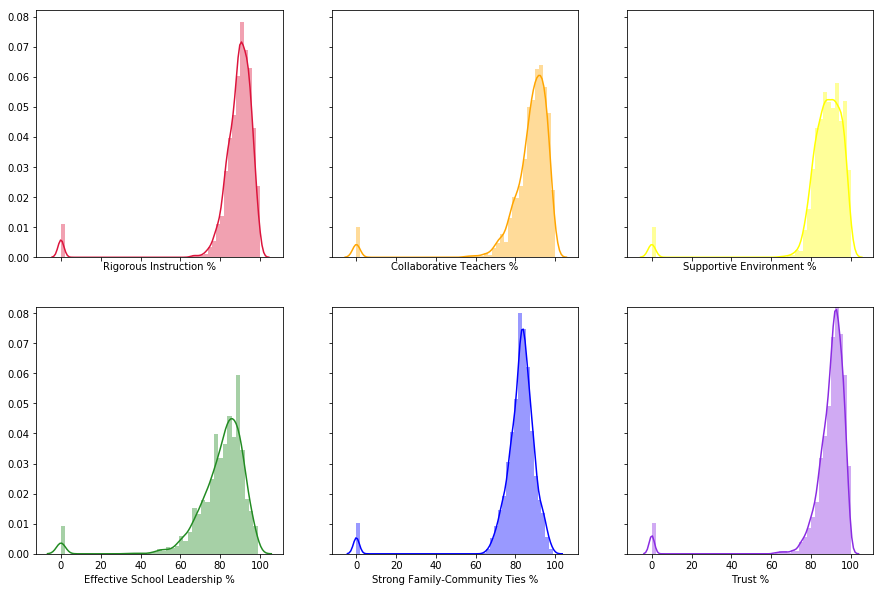

In [22]:
f, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
sns.distplot( schools_sm["Rigorous Instruction %"] , color="crimson", ax=axes[0, 0])
sns.distplot( schools_sm["Collaborative Teachers %"] , color="orange", ax=axes[0, 1])
sns.distplot( schools_sm["Supportive Environment %"] , color="yellow", ax=axes[0, 2])
sns.distplot( schools_sm["Effective School Leadership %"] , color="forestgreen", ax=axes[1, 0])
sns.distplot( schools_sm["Strong Family-Community Ties %"] , color="blue", ax=axes[1, 1])
sns.distplot( schools_sm["Trust %"] , color="blueviolet", ax=axes[1, 2])
plt.show()

These density plots help me to better visualize how the data is distributed. 

Next, I want to use a heatplot to examine the relationships between the criteria. Unfortunately, I will now have to undo my work from above (when I replaced all NaN values with 0s to convert the data into numeric values). For the heatplot, I will have to replace all 0s with NaNs and then drop these NaN values. 

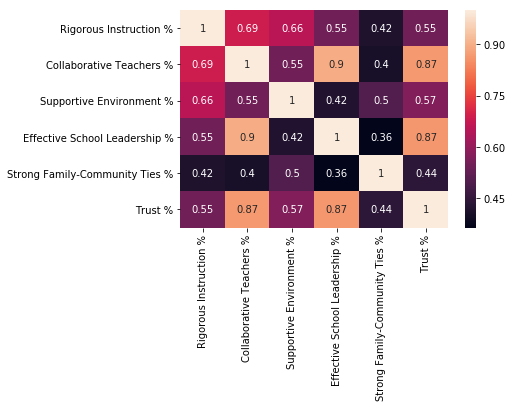

In [23]:
schools_sm.iloc[:, [20, 22, 24, 26, 28, 30]] = schools_sm.iloc[:, [20, 22, 24, 26, 28, 30]].replace(0, np.nan)
schools_sm

s = (schools_sm.loc[:, ['Rigorous Instruction %','Collaborative Teachers %','Supportive Environment %','Effective School Leadership %','Strong Family-Community Ties %','Trust %']].dropna()).corr()

sns.heatmap(s, annot=True)
plt.show()

Looking at the heatmap, I can see that some criteria are strongly correlated with one another. For example, a school's "Effective School Leadership" ranking will be closely linked to its "Collaborative Teachers" and "Trust" ratings. I can also see that "Effective School Leadership" and "Collaborative Teachers" have the strongest relationship (.9). 

## Reshaping and Preparing Data

To help PASSNYC better identify potential schools to target with their test, I will use some basic machine learning techniques to predict which schools will most benefit from PASSNYC's services. 

To do so, I will examine schools who have successfully participated in PASSNYC programs and try to identify why these schools were successful. But what does "successful" in this context mean? 

Unfortunately, the data given to me is very limited. I only have access to the number of students who enrolled in the PASSNYC program, the number of students who enrolled in the SHSAT test, and the number of students who actually took this test. Due to such limitations, I will define "successful" as the schools with the highest percentage of students who took the SHSAT test. I am making the assumption that if a student enrolled in a PASSNYC program or registered for the SHSAT test but never actually took the SHSAT test, the student found the PASSNYC program unhelpful. 

To use this approach, I will have to first calculate the "completion rate" for each school for each year, add a column with these values and reshape the dataframe so it only contains an averaged completion rate for the years 2013-2016. In doing so, I am making the assumption that factors pertaining to the schools' demographics or ratings on factors like effectiveness, trust, and rigorous instruction are less likely to change from year to year (in short: that a school's percentage of hispanic students or rating on trust in 2013 will not look much different than in 2016). By averaging the completion rates, I am also ignoring any potential outlier years - a school which might have had a completion rate of 20% in 2013, 2014, and 2016, but a rate of only 8% in 2015. 

In [24]:
#calculate completion rate and add a new column 
testers['Completion Rate'] = testers["Number of students who took the SHSAT"]/testers['Enrollment on 10/31']*100

#calculate averaged completion rate across years
testers_grouped = testers.groupby(['School name'])['Completion Rate'].mean()
testers_averaged_df = testers_grouped.to_frame()
testers_averaged_rate = testers_averaged_df.reset_index()

testers_averaged_rate.sample(5)

,School name,Completion Rate
0,Academy for Social Action,0.000000
4,Democracy Prep Charter School,10.491760
23,St. HOPE Leadership Academy Charter School,22.809598
17,Mott Hall High School,0.192308
10,Harlem Children's Zone Promise Academy II Char...,12.853972


To check that my calculations are correct, I will pull one of the schools from the original dataframe

In [25]:
#pull averaged data
testers_averaged_rate[testers_averaged_rate['School name'] == "Eagle Academy for Young Men of Harlem"]

,School name,Completion Rate
7,Eagle Academy for Young Men of Harlem,5.526316


In [26]:
#pull original tester data
testers[testers['School name'] == "Eagle Academy for Young Men of Harlem"]

,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT,Completion Rate
12,05M148,Eagle Academy for Young Men of Harlem,2015,8,76,5,5,6.578947
13,05M148,Eagle Academy for Young Men of Harlem,2016,8,60,7,6,10.000000
14,05M148,Eagle Academy for Young Men of Harlem,2016,9,86,0,0,0.000000


I can see that the averaged completion rate I calculated above matches the averaged completion rate based on the values in the original dataframe.

Now that I have the averaged completion rate for each school, I will pull in other features from my first dataframe, append these values onto the reshaped dataframe, and remove any unnecessary columns.

In [27]:
#standardize lettering
schools['School Name'] = schools['School Name'].str.title()
testers_averaged_rate['School name'] = testers_averaged_rate['School name'].str.title()

#merge dataframes to add features
testers_features = pd.merge(testers_averaged_rate, schools, left_on = "School name", right_on = "School Name", how = "inner")

#remove unnecessary columns
testers_features_sm = testers_features[['School name', 
 'Completion Rate',  
 'Community School?',
 'Economic Need Index',
 'School Income Estimate',
 'Percent ELL',
 'Percent Asian',
 'Percent Black',
 'Percent Hispanic',
 'Percent Black / Hispanic',
 'Percent White',
 'Student Attendance Rate',
 'Percent of Students Chronically Absent',
 'Rigorous Instruction %',
 'Rigorous Instruction Rating',
 'Collaborative Teachers %',
 'Collaborative Teachers Rating',
 'Supportive Environment %',
 'Supportive Environment Rating',
 'Effective School Leadership %',
 'Effective School Leadership Rating',
 'Strong Family-Community Ties %',
 'Strong Family-Community Ties Rating',
 'Trust %',
 'Trust Rating',
 'Student Achievement Rating',
 'Average ELA Proficiency',
 'Average Math Proficiency']].copy()

testers_features_sm.sample(5)

,School name,Completion Rate,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,...,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency
1,Democracy Prep Charter School,10.491760,No,0.714,NaN,3%,1%,67%,29%,97%,...,Exceeding Target,91%,Exceeding Target,82%,Meeting Target,93%,Meeting Target,Exceeding Target,2.64,3.07
5,Frederick Douglass Academy,6.749453,No,0.708,NaN,3%,1%,71%,23%,94%,...,Meeting Target,75%,Approaching Target,78%,Meeting Target,85%,Approaching Target,Approaching Target,2.41,2.24
10,Kipp Infinity Charter School,12.513540,No,0.798,"$33,303.04",12%,0%,30%,68%,98%,...,Exceeding Target,94%,Exceeding Target,90%,Exceeding Target,95%,Exceeding Target,Exceeding Target,2.60,3.13
2,Democracy Prep Endurance Charter School,17.094416,No,0.755,NaN,6%,0%,66%,31%,98%,...,Exceeding Target,97%,Exceeding Target,83%,Meeting Target,95%,Exceeding Target,Exceeding Target,2.60,2.82
0,Columbia Secondary School,23.061212,No,0.507,NaN,0%,12%,21%,44%,65%,...,Exceeding Target,90%,Exceeding Target,84%,Exceeding Target,93%,Exceeding Target,Exceeding Target,3.47,3.73


## Modeling

To begin modeling, I will select a "Prediction Target" and six features that I want to further examine.

In [28]:
#select Prediction Target
y = testers_features_sm['Completion Rate']

#create list of features
features = ['Rigorous Instruction %',
            'Collaborative Teachers %',
            'Supportive Environment %',
            'Effective School Leadership %',
            'Strong Family-Community Ties %',
            'Trust %']

#select features from dataframe
X = testers_features_sm[features]

Next, I want to quickly examine what these selected features look like from a statistical perspective, using the .describe() method.

In [29]:
#examine features
X.describe()

,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
count,21,21,21,21,21,21
unique,13,14,13,17,12,13
top,87%,89%,80%,90%,82%,90%
freq,3,4,3,2,5,3


Hmm...when I use this method, it only pulls very basic computations. This tells me that the values are not currently saved numerically in the dataframe. Before selecting and using a model, I will have to convert these values to integers. 

Looking back into the dataframe, I see that most values (such as "Trust %") include a percentage sign (%). These characters are preventing my data from being read numerically and will have to be removed before I can continue with my modeling.

In [30]:
#replace NaN with 0
testers_features_sm = testers_features_sm.fillna(0)

#remove % sign from specific columns
testers_features_sm.iloc[:, [13, 15, 17, 19, 21, 23]] = testers_features_sm.iloc[:, [13, 15, 17, 19, 21, 23]].replace({'\%':''}, regex = True)

In [31]:
#convert all selected column values to integers
testers_features_sm.iloc[:, [13, 15, 17, 19, 21, 23]] = testers_features_sm.iloc[:, [13, 15, 17, 19, 21, 23]].astype(int)

In [32]:
testers_features_sm[features].dtypes

Rigorous Instruction %            int32
Collaborative Teachers %          int32
Supportive Environment %          int32
Effective School Leadership %     int32
Strong Family-Community Ties %    int32
Trust %                           int32
dtype: object

Now that my data is saved correctly, I will reassign it to the "X" variable.

In [33]:
X = testers_features_sm[features]

In [34]:
X.describe()

,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,87.333333,88.428571,83.904762,82.619048,82.666667,89.761905
std,4.963198,6.384132,3.961121,8.399263,4.127146,3.672938
min,77.000000,72.000000,78.000000,65.000000,74.000000,81.000000
25%,85.000000,86.000000,80.000000,76.000000,81.000000,88.000000
50%,87.000000,89.000000,84.000000,82.000000,82.000000,90.000000
75%,91.000000,92.000000,87.000000,90.000000,84.000000,92.000000
max,97.000000,99.000000,91.000000,97.000000,92.000000,95.000000


When I use the .describe() feature, I retrieve the statistical information I was looking for. Additionally, when I examine the first few rows of the dataframe, I can see that the percentage sign has been removed.  

In [35]:
X.head(5)

,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
0,87,92,88,90,84,93
1,91,96,86,91,82,93
2,97,99,88,97,83,95
3,86,89,78,83,85,89
4,92,91,83,91,82,90


Now I am ready to begin modeling. My data is continuous, which means that there is a relationship between the distance of two variables. For example, I know that a trust percentage of 83% is "better" than a trust percentage of 50%. This means I will be using regression analysis, rather than classification analysis. 

There are a few basic machine learning regression models that I will examine: K Nearest Neighbors Regressor, Decision Tree Regressor, Random Forest Regressor, and Linear Regressor. To select the best model, I will create a simple function which examines all four models and uses cross-validation techniques to evaluate their accuracy.

Before writing the function, however, I want to tune the parameters of the K Nearest Neighbor model. I will also use cross-validation techniques for the tuning. 

In [36]:
#import new packages
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

#10-fold cross-validation with K = 5 for K Nearest Neighbor (KNN)
knn = KNeighborsRegressor(n_neighbors = 5)
scores = cross_val_score(knn, X, y, cv=10, scoring="neg_mean_squared_error")
print (scores)

[ -74.79724526 -169.93817629 -114.99072691   -3.86987714  -47.35786015
  -92.32643876  -14.04865175  -20.78831506 -466.16306439 -127.78705894]


In [37]:
#user average accuracy as an estimate of out-of-sample accuray
print (scores.mean())

-113.206741466


In [38]:
# tune parameters
k_range = range(1, 15)
k_scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv=10, scoring="neg_mean_squared_error")
    k_scores.append(scores.mean())
print(k_scores)

[-184.29715073086692, -127.17332593944964, -109.27979946200131, -119.7406895104032, -113.20674146551748, -120.49071607630935, -115.85858284091739, -114.80730608403962, -110.79341971574181, -110.29900558097827, -108.92475221974239, -107.0363540843407, -111.67994407636805, -109.21245633484182]


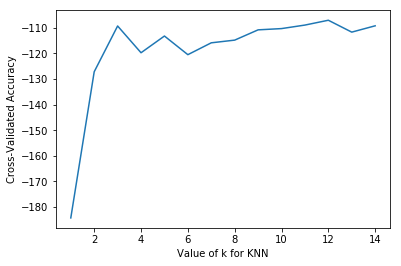

In [39]:
import matplotlib.pyplot as plt

#plot the value of k for KNN versus the cross-validated accuracy
plt.plot(k_range, k_scores)
plt.xlabel("Value of k for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.show()

The graph helps me to better visualize and compare the values of k with their accuracy. From the graph, I see that model's accuracy is best when k = 3 and when k = 12. If I select a small k value, noise will have a higher influence on my result, but a larger k will be computationally expensive. My goal is to select a value that will produce the simplest model, without sacrificing accuracy. Additionally, it is a best practice to always select an odd k value. I have decided to select 9, as it is an odd number with a relatively high accuracy. 

I will now compare several different regression models by creating a function to compare their accuracy using two regression metrics: Mean Absolute Error and Mean Squared Error. The main difference between the two metrics is that Mean Absolute Error is less sensitive to outliers than Mean Squared Error. 

DR: -11.257169 (4.805346)
RF: -7.763735 (4.475819)
LR: -9.075172 (6.009835)
KNN: -8.245338 (4.879455)


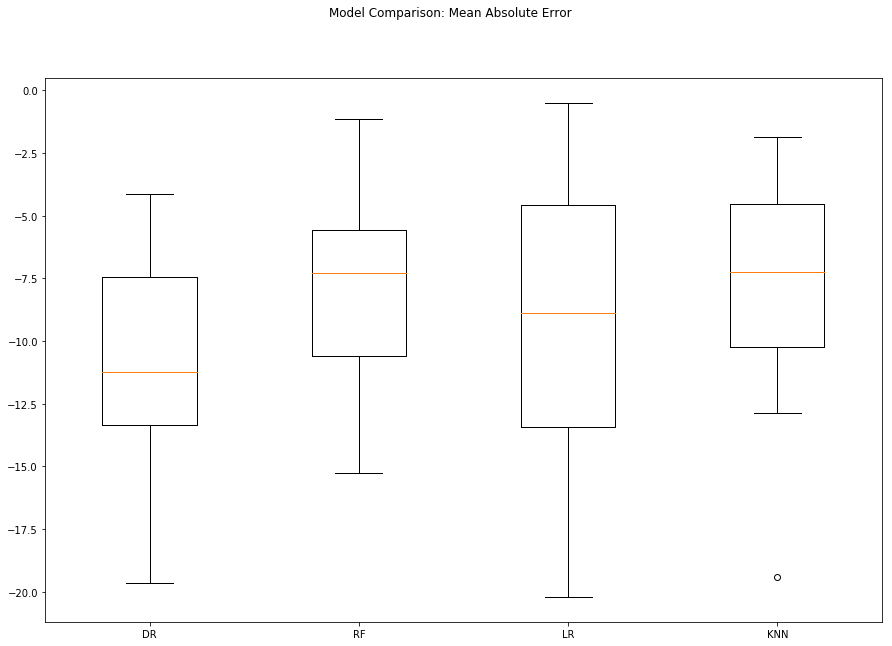

In [40]:
#import new packages
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('DR', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor(n_neighbors=5)))

# evaluate each model in turn
results_1 = []
names_1 = []
scoring_1 = "neg_mean_absolute_error"

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results_1 = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring_1)
    results_1.append(cv_results_1)
    names_1.append(name)
    msg_1 = "%s: %f (%f)" % (name, cv_results_1.mean(), cv_results_1.std())
    print(msg_1)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Model Comparison: Mean Absolute Error')
ax = fig.add_subplot(111)
plt.boxplot(results_1)
ax.set_xticklabels(names_1)
plt.show()

DR: -207.371222 (181.464210)
RF: -123.602198 (119.576786)
LR: -139.577410 (130.151036)
KNN: -113.206741 (128.291770)


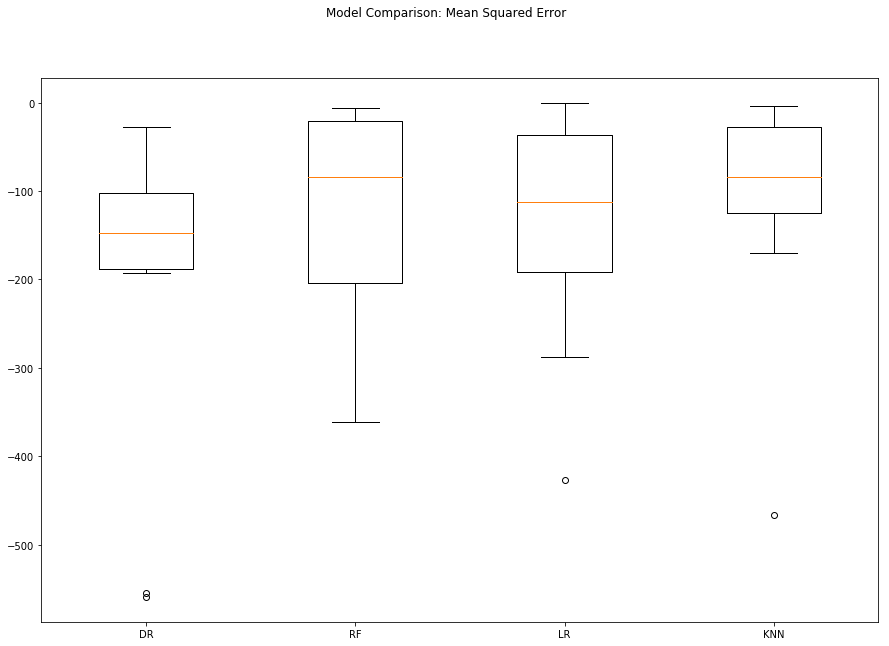

In [41]:
# different scoring method
results_2 = []
names_2 = []
scoring_2 = "neg_mean_squared_error"

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results_2 = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring_2)
    results_2.append(cv_results_2)
    names_2.append(name)
    msg_2 = "%s: %f (%f)" % (name, cv_results_2.mean(), cv_results_2.std())
    print(msg_2)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Model Comparison: Mean Squared Error')
ax = fig.add_subplot(111)
plt.boxplot(results_2)
ax.set_xticklabels(names_2)
plt.show()

I see that the Random Forest model performs best using both metrics, so this is the model I will use. 

In [42]:
#import packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#split data into training and validation data
train_X, val_X, train_y, val_y = train_test_split(X, y)

#define model
rf_model = RandomForestRegressor()

#fit model
rf_model.fit(train_X, train_y)

#get predictions on validation data
rf_predict = rf_model.predict(val_X)

# determine importance of each feature 
feature_importances = pd.DataFrame(rf_model.feature_importances_, index = train_X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
feature_importances.head(10)

,Importance
Strong Family-Community Ties %,0.385251
Supportive Environment %,0.287303
Rigorous Instruction %,0.136072
Effective School Leadership %,0.092100
Collaborative Teachers %,0.064398
Trust %,0.034877


In [43]:
#assess accuracy of model 
print(mean_absolute_error(val_y, rf_predict))

4.82893250523


## Conclusions

If PassNYC would like to use a more tailored approach to selecting schools for its program, it should prioritize schools with high Strong Family-Community Ties percentages.